In [1]:
import numpy as np

def yrp(q):
    srcp = 2 * (q[0] * q[1] + q[2] * q[3])
    crcp = 1 - 2 * (q[1] * q[1] + q[2] * q[2])
    roll = np.arctan2(srcp, crcp)
    
    sp = 2 * (q[0] * q[2] - q[3] * q[1])
    if sp >= 1:
        pitch = 3.14159/2
    elif sp <= -1:
        pitch = -3.14159/2
    else:
        pitch = np.arcsin(sp)
    
    sycp = 2 * (q[0] * q[3] + q[1] * q[2])
    cycp = 1 - 2 * (q[2] * q[2] + q[3] * q[3])
    yaw = np.arctan2(sycp, cycp)
    
    return yaw, roll, pitch

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
import math
import ahrs_py

m = ahrs_py.MargEkfBofh()

log = []

w = 0
theta = math.pi
dt = 0.01
force = 1

for i in range(2000):
    w = 0
    if i > 500:
        w = 0.15
        theta += w * dt

    accel = [0, 0, -1]
    mag = [force*math.sin(theta), force*math.cos(theta), 0]

    m.predict(0, 0, w, dt)
    m.update(accel, mag)
    
    log.append([
        w, theta, accel, mag,
        m.state, m.predicted_accel_mag
    ])

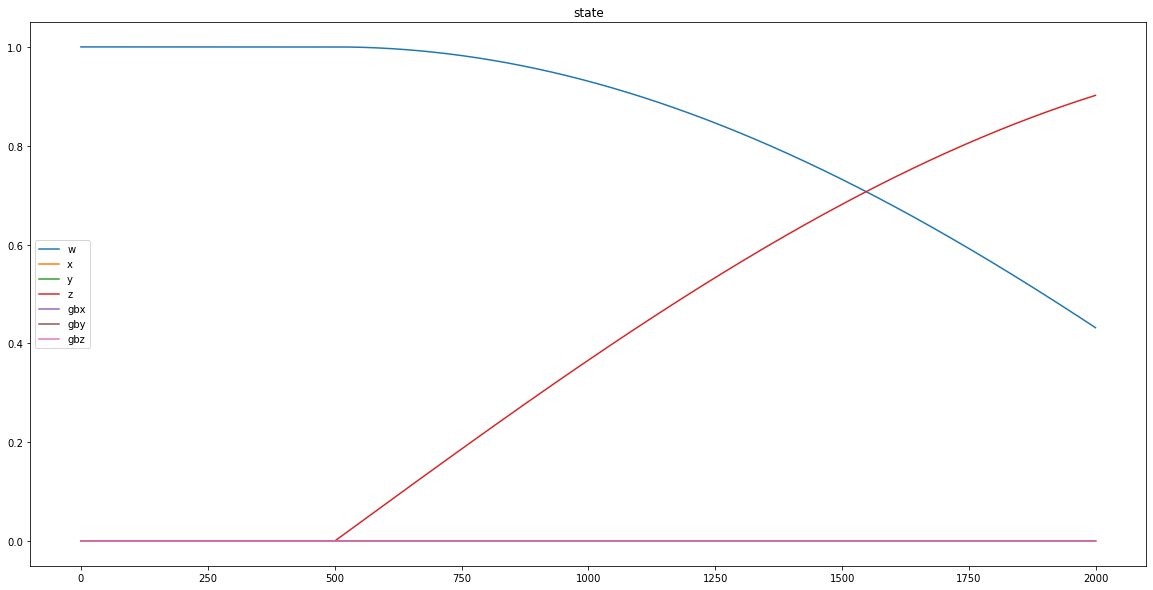

In [4]:
plt.plot([l[4] for l in log])
plt.title("state")
plt.legend(["w", "x", "y", "z", "gbx", "gby", "gbz"])

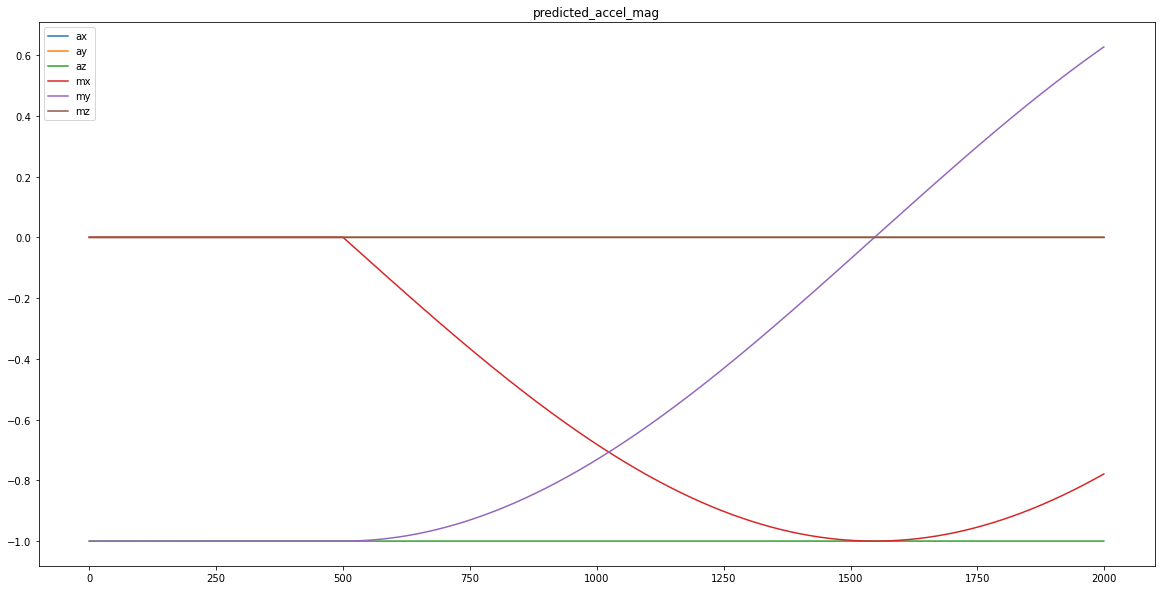

In [5]:
plt.plot([l[5] for l in log])
plt.title("predicted_accel_mag")
plt.legend([t+a for t in "am" for a in "xyz"])

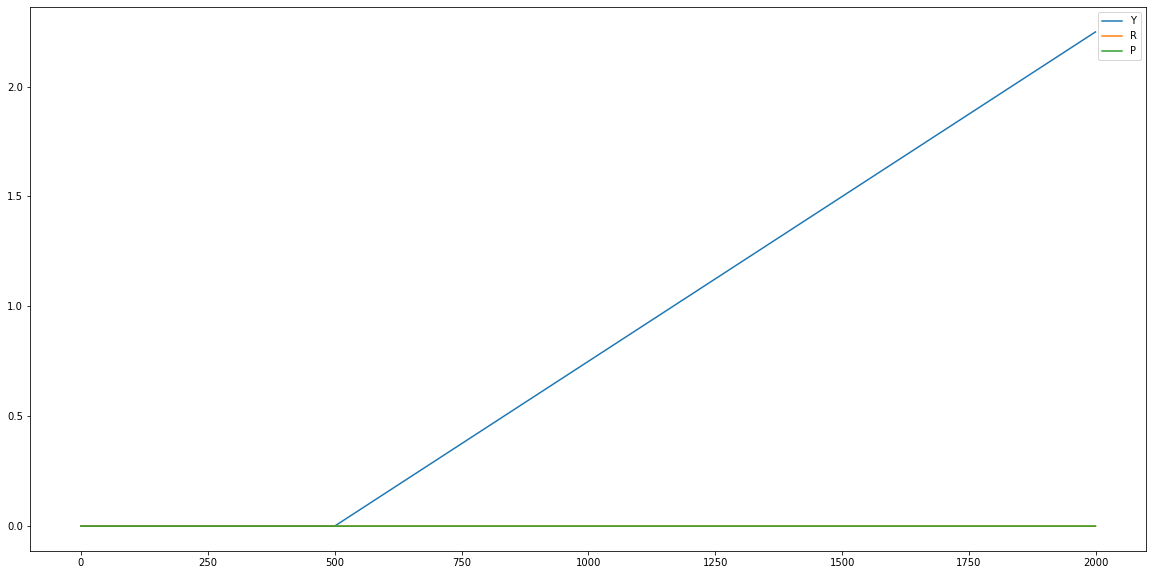

In [6]:
plt.plot([yrp(l[4]) for l in log])
plt.legend(["Y", "R", "P"])

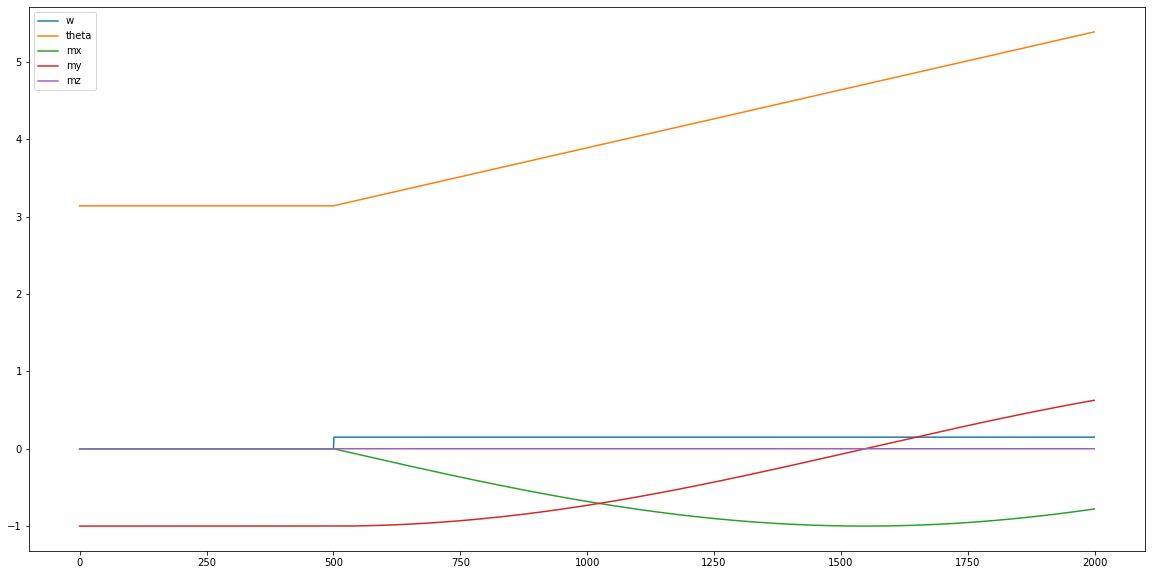

In [7]:
plt.plot([(l[0], l[1], *l[3]) for l in log])
plt.legend(["w", "theta", "mx", "my", "mz"])